<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;"><a href="http://www.editorialuoc.cat/mineria-de-datos" target="_blank">Minería de datos: Modelos y algoritmos</a></p>
<p style="margin: 0; text-align:right;">Estudios de Informática, Multimedia y Telecomunicación</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Universitat Oberta de Catalunya (<b>UOC</b>)</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

# CH12EJ1 Redes neuronales

## 1. Carga de datos y tareas de preprocesado

Trabajaremos con el paquete R `neuralnet` y con el juego de datos [Breast Cancer Wisconsin (Diagnostic) Data Set](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28diagnostic%29).

Veremos las distintas posibilidades de una read neuronal: capas, neuronas y criterio de parada.

### Instalación y carga de paquetes R

Para empezar, cargamos todos los paquetes que van a ser utilizados a lo largo del ejercicio.

In [1]:
if (!require(dplyr)) {
    install.packages('dplyr', repos='http://cran.es.r-project.org')
    require(dplyr)
}

if (!require(neuralnet)) {
    install.packages('neuralnet', repos='http://cran.es.r-project.org')
    require(neuralnet)
}

if (!require(reshape)) {
    install.packages('reshape', repos='http://cran.es.r-project.org')
    require(reshape)
}

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: neuralnet


Attaching package: ‘neuralnet’


The following object is masked from ‘package:dplyr’:

    compute


Loading required package: reshape


Attaching package: ‘reshape’


The following object is masked from ‘package:dplyr’:

    rename




### Manipulación y preparación de los datos

Leemos el fichero de datos y vemos que consiste en 32 variables, y en la documentación vemos que estas corresponden a:

- 1: Identificador de la muestra
- 2: Diagnóstico (M = maligno, B = benigno)
- 3-32: DIferentes medidas del tamaño y forma del núcleo de las células

In [2]:
raw.data <- read.table(
    url("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"), 
    sep=",",
    header=FALSE
)

Nuestro objetivo es crear un modelo que nos permita predecir si una célula del tejido del pecho es beningna o maligna. Eliminamos la variable V1 que no tiene valor predictivo.

In [3]:
prep.data <- raw.data %>% select(-V1)
head(prep.data)

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,⋯,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,⋯,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
2,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,⋯,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
3,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,⋯,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
4,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,⋯,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
5,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,⋯,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
6,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,⋯,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


Visualizamos la distribución de nuestra variable objetivo a predecir `V2`.

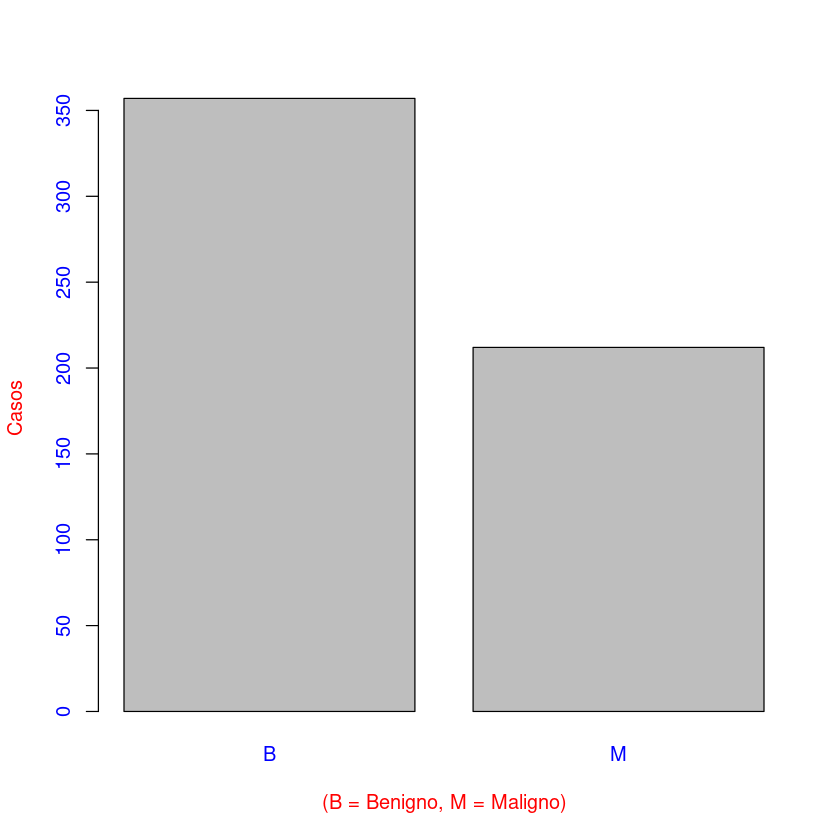

In [4]:
plot(
    prep.data$V2,
    xlab = "(B = Benigno, M = Maligno)",
    ylab = "Casos",
    col.axis = "blue",
    col.lab = "red"
)

Como la función R `neuralnet()` que vamos a usar para generar el modelo solo admite valores numéricos, convertiremos los valores `B` en `0` y `M` en `1`.

In [5]:
prep.data$V2 <- as.character(prep.data$V2)
prep.data$V2[prep.data$V2 == "B"] <- 0
prep.data$V2[prep.data$V2 == "M"] <- 1
prep.data$V2 <- as.numeric(prep.data$V2)

table(prep.data$V2)


  0   1 
357 212 

Visualizar un resumen de los datos

In [6]:
summary(prep.data)

       V2               V3               V4              V5        
 Min.   :0.0000   Min.   : 6.981   Min.   : 9.71   Min.   : 43.79  
 1st Qu.:0.0000   1st Qu.:11.700   1st Qu.:16.17   1st Qu.: 75.17  
 Median :0.0000   Median :13.370   Median :18.84   Median : 86.24  
 Mean   :0.3726   Mean   :14.127   Mean   :19.29   Mean   : 91.97  
 3rd Qu.:1.0000   3rd Qu.:15.780   3rd Qu.:21.80   3rd Qu.:104.10  
 Max.   :1.0000   Max.   :28.110   Max.   :39.28   Max.   :188.50  
       V6               V7                V8                V9         
 Min.   : 143.5   Min.   :0.05263   Min.   :0.01938   Min.   :0.00000  
 1st Qu.: 420.3   1st Qu.:0.08637   1st Qu.:0.06492   1st Qu.:0.02956  
 Median : 551.1   Median :0.09587   Median :0.09263   Median :0.06154  
 Mean   : 654.9   Mean   :0.09636   Mean   :0.10434   Mean   :0.08880  
 3rd Qu.: 782.7   3rd Qu.:0.10530   3rd Qu.:0.13040   3rd Qu.:0.13070  
 Max.   :2501.0   Max.   :0.16340   Max.   :0.34540   Max.   :0.42680  
      V10           

### Datos de entrenamiento y datos de test

Separamos las variables dependientes `data`y la variable a independiente `labels`.

In [7]:
data <- prep.data

Eliminamos aquellos casos que no estén completos, es decir, que tengan valores nulos. En este caso, no es imprescindible porque todos están completos.

In [8]:
data <- data[complete.cases(data), ]

Definimos el conjunto de entrenamiento y de test, cun una proporción del 90% al 10%.

In [9]:
index <- sample(1:nrow(data),round(0.90*nrow(data)))
index <- 1:round(0.90*nrow(data))
train <- data[index,]
test <- data[-index,]

head(train)

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,⋯,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,⋯,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
2,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,⋯,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
3,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,⋯,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
4,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,⋯,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
5,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,⋯,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
6,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,⋯,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


Analizamos la correlación de las variables, para seleccionar una variable de cada cluster y así no introducir variables muy correlacionadas que puedan dificultar el buen funcionamiento del modelo.

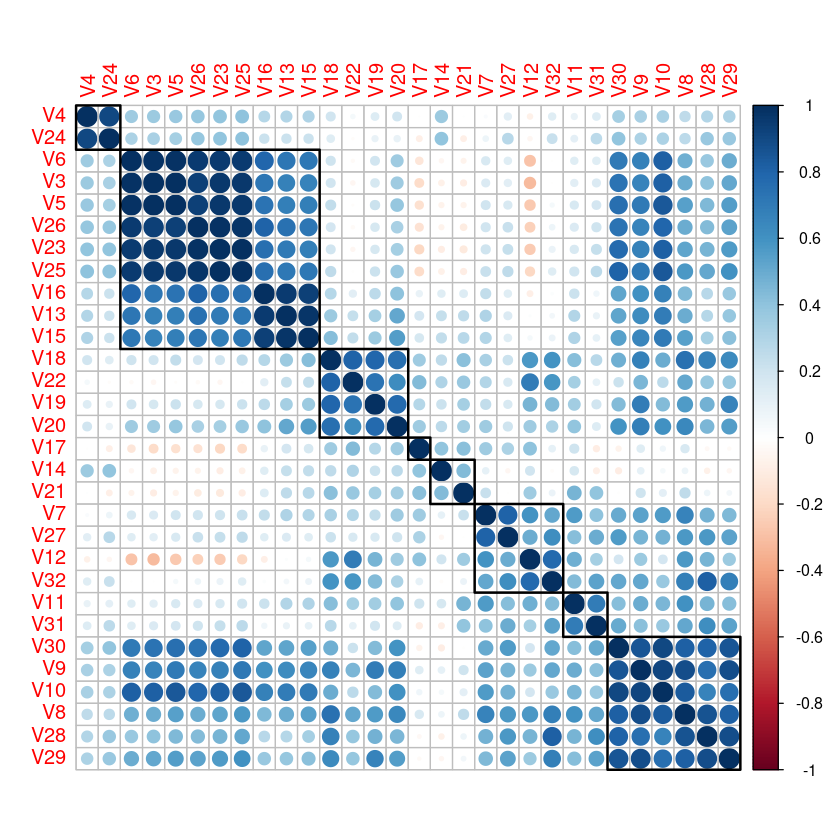

In [10]:
df_corr <- cor(train %>% select(-V2))
corrplot::corrplot(df_corr, order = "hclust", tl.cex = 1, addrect = 8)

## 2. Creación de los modelos

### Modelo con una capa de 2 neuronas y con un criterio de parada de 0.01
Creamos una red neuronal de una sola capa.

In [11]:
set.seed(10)

net.1 <- neuralnet(
    V2~V4+V5,
    data=train,
    hidden=2,
    threshold=0.01
)

Cargamos la siguiente función que nos permitirá visualizar gráficamente la red neuronal.

In [12]:
source('https://gist.githubusercontent.com/fawda123/7471137/raw/466c1474d0a505ff044412703516c34f1a4684a5/nnet_plot_update.r')

Loading required package: scales



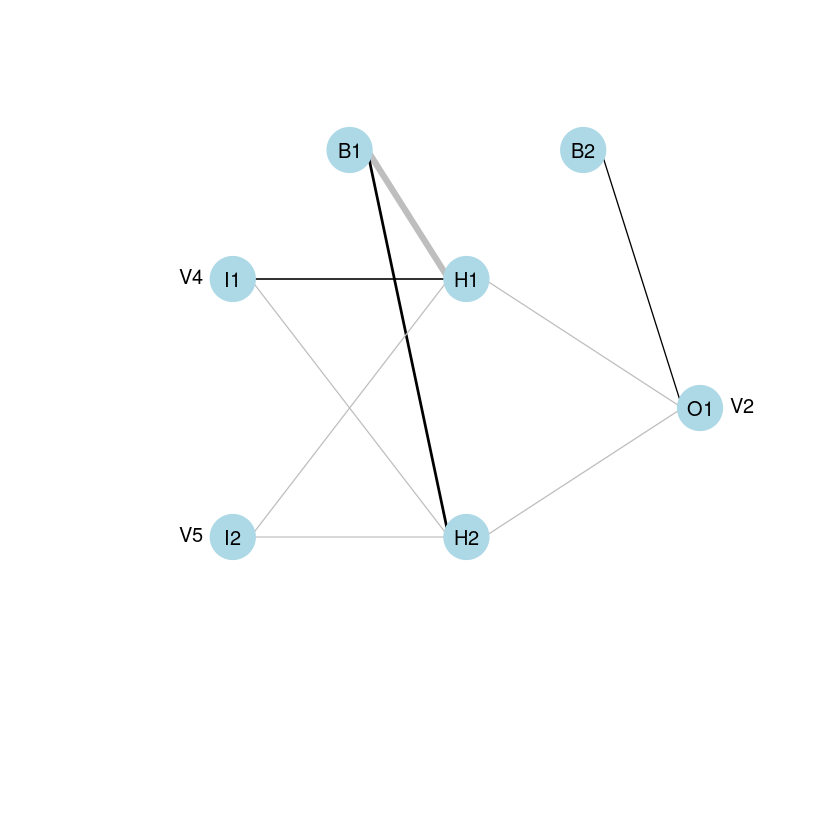

In [13]:
plot.nnet(net.1)

Obtenemos un resumen del nivel de precisión del modelo.

In [14]:
net.1$result.matrix[1:3,]

error reached.threshold             steps 
     1.720953e+01      9.995462e-03      3.851000e+04

Realizamos la predicción con los datos de test.

In [15]:
net.predict1 <- neuralnet::compute(net.1, test %>% select(V4, V5))
pred1 <- round(net.predict1$net.result)

In [16]:
net.predict1$net.result

513,0.362768655
514,0.092986199
515,0.551972875
516,0.030997661
517,1.009923118
518,1.019557672
519,0.114112167
520,0.055120490
521,0.009398206
522,1.022880130
523,0.037006557


Y generamos una matriz de confusión para medir el grado de acierto de la predicción

In [17]:
t1 <- table(pred = pred1, real = test[,1])
print(t1)
print(paste("Accuracy =", round(100 * sum(diag(t1)) / sum(t1), digits=2)))

    real
pred  0  1
   0 38  1
   1  5 13
[1] "Accuracy = 89.47"


### Modelo de 3 capas de 3, 2 y 1 neuronas y con un criterio de parada de 0.01

Ahora realizaremos el mismo análisis con una red neuronal de tres capas.

In [18]:
set.seed(10)
net.2 <- neuralnet(
    V2~V4+V5,
    data=train,
    hidden=c(3,2,1),
    threshold=0.01
)

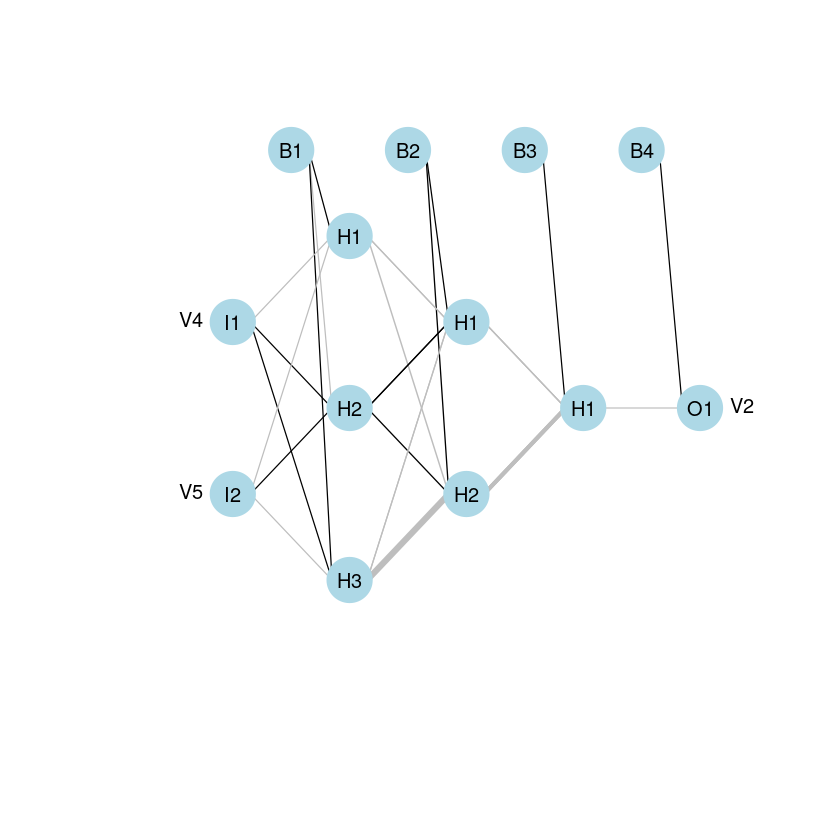

In [19]:
plot.nnet(net.2)

Obtenemos un resumen del nivel de precisión del modelo

In [20]:
net.2$result.matrix[1:3,]

error reached.threshold             steps 
     1.565001e+01      9.746866e-03      8.891300e+04

Realizamos la predicción con los datos de test.

In [21]:
net.predict2 <- neuralnet::compute(net.2, test[,2:3]) 
pred2 <- round(net.predict2$net.result)

Y generamos una matriz de confusión para medir el grado de acierto de la predicción

In [22]:
t2 <- table(pred = pred2, real = test[,1])
print(t2)
print(paste("Accuracy =", round(100 * sum(diag(t2)) / sum(t2), digits=2)))

    real
pred  0  1
   0 43 14
[1] "Accuracy = 75.44"
